(86, 88)
(54, 64)


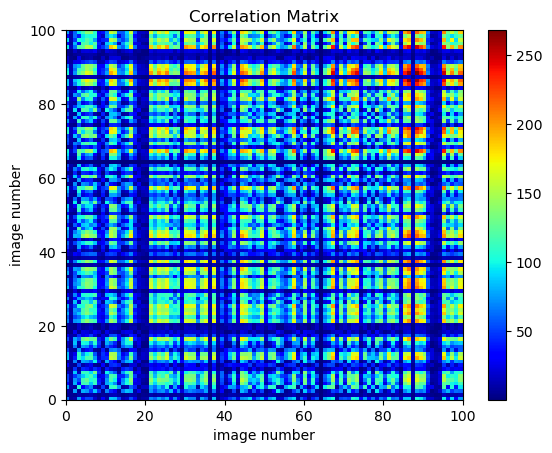

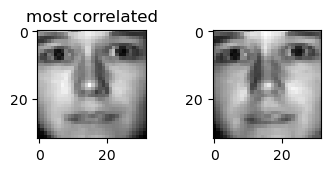

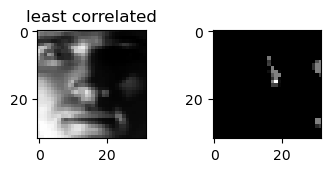

In [93]:
#
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Part A
results=loadmat('yalefaces.mat')
X=results['X']

C = np.dot(X[:, :100].T, X[:, :100])
C_max = C.copy()
C_min = C.copy()
np.fill_diagonal(C_max, 0)
np.fill_diagonal(C_min, 250)

plt.figure(0)
plt.pcolor(C, cmap = 'jet')
plt.title("Correlation Matrix")
plt.xlabel("image number")
plt.ylabel("image number")
plt.colorbar()


#Part B 

max_ind = np.unravel_index(np.argmax(C_max), C.shape)
min_ind = np.unravel_index(np.argmin(C_min), C.shape)

print(max_ind)
print(min_ind)

plt.figure(1)
plt.subplot(3,3,1)
plt.title("most correlated")
plt.imshow(np.reshape(X[:,max_ind[0]], (32,32), order = 'F').T, cmap = 'gray' )
plt.subplot(3,3,2)
plt.imshow(np.reshape(X[:,max_ind[1]], (32,32), order = 'F').T, cmap = 'gray' )

plt.figure(2)
plt.subplot(3,3,1)
plt.title("least correlated")
plt.imshow(np.reshape(X[:,min_ind[0]], (32,32), order = 'F').T, cmap = 'gray' )
plt.subplot(3,3,2)
plt.imshow(np.reshape(X[:,min_ind[1]], (32,32), order = 'F').T, cmap = 'gray' )

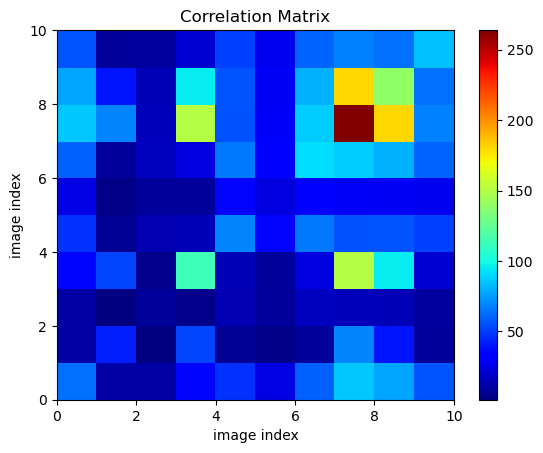

In [88]:
#Part C
X_10 = np.array([1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005])
X_10 = X_10 - 1

C = np.dot(X[:, X_10].T, X[:, X_10])

plt.figure(0)
plt.pcolor(C, cmap = 'jet')
plt.title("Correlation Matrix")
plt.xlabel("image index")
plt.ylabel("image index")
plt.colorbar()

In [84]:
#Part D

Y = np.matmul(X, X.T)
eigvalues, eigenvectors = np.linalg.eig(Y)

sort_eig = np.argsort(eigvalues)[::-1]

largest_eigvec = eigenvectors[:, sort_eig]
print(largest_eigvec[:, :6])

[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


In [85]:
#Part E
u,s,v = np.linalg.svd(X)
# v_t gives the principal directions of the matrix while u are the principal component of the matrix matching up to the eigenvectors
six_principal_directions = v[:, :6]


In [86]:
#Part F
norm_svd_and_eig = np.linalg.norm(np.abs(largest_eigvec[:,0])- np.abs(u[:,0]))
print(norm_svd_and_eig)

4.465152617342574e-16


[72.92756746909562, 15.281762655694365, 2.56674494298527, 1.877524851471473, 0.6393058444446512, 0.5924314415034935]


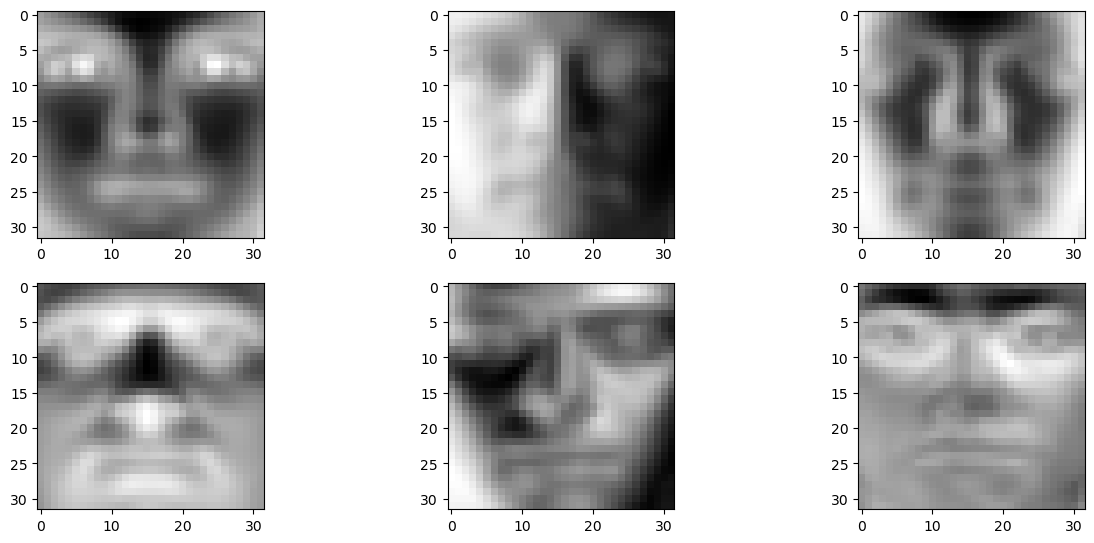

In [92]:
#Part G
sum_squared = np.sum(s**2)

variances = [(s[i]**2/sum_squared)*100 for i in range(6)]
print(variances)

fig = plt.figure(figsize=(15, 10))
for k in range(6):
    Up = u[:, k].reshape((32, 32), order='F')
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot,cmap = 'gray')
    